In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from Bio import SeqIO
from matplotlib import pyplot as plt
%matplotlib notebook

In [40]:
# see http://genome.ucsc.edu/FAQ/FAQformat#format1 for BED format

#source: ftp://ccg.vital-it.ch/epdnew/H_sapiens/006/
bedfile = './epd/006/Hs_EPDnew_006_hg38.bed'
epd_data = pd.read_csv(bedfile, sep=' ', header=0, 
                       names=['Chrom', 'ChromStart', 'ChromEnd', 'Name', 'Score', 'Strand', 'ThickStart', 'ThickEnd'])

In [41]:
epd_data

,Chrom,ChromStart,ChromEnd,Name,Score,Strand,ThickStart,ThickEnd
0,chr1,960583,960643,KLHL17_1,900,+,960632,960643
1,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492
2,chr1,976670,976730,PERM1_1,900,-,976670,976681
3,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097
4,chr1,1000461,1000521,ISG15_2,900,+,1000510,1000521
5,chr1,1013447,1013507,ISG15_1,900,+,1013496,1013507
6,chr1,1020070,1020130,AGRN_1,900,+,1020119,1020130
7,chr1,1173848,1173908,TTLL10_1,900,+,1173897,1173908
8,chr1,1179638,1179698,TTLL10_2,900,+,1179687,1179698
9,chr1,1205579,1205639,TNFRSF18_3,900,-,1205579,1205590


In [11]:
promoter1 = epd_data.iloc[0]
promoter1['ChromStart'], promoter1['ChromEnd']

(960583, 960643)

In [44]:
pr1_seq = chr_data['chr1'][promoter1['ChromStart']: promoter1['ChromEnd']]

In [6]:
chr_set = set(epd_data['Chrom'])

In [9]:
chr_data = {}
for chr_name in tqdm_notebook(chr_set):
    filename = './hg38/' + chr_name + '.fa'
#     print(filename)
    chr_data[chr_name] = next(SeqIO.parse(filename, 'fasta'))

<IPython.core.display.Javascript object>


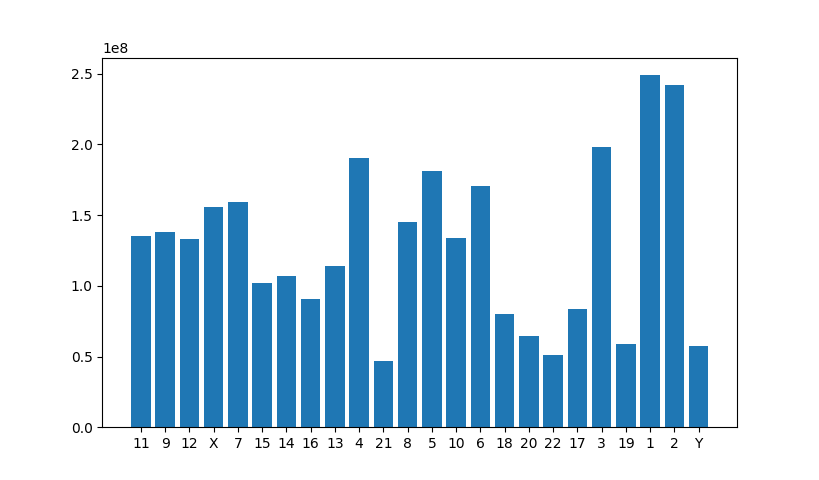

<BarContainer object of 24 artists>

In [35]:
plt.bar([name[3:] for name in chr_data.keys()], [len(seq) for seq in chr_data.values()])

In [71]:
epd_data_ch1 = epd_data[epd_data['Chrom'] == 'chr1'].copy()
epd_data_ch1

,Chrom,ChromStart,ChromEnd,Name,Score,Strand,ThickStart,ThickEnd
0,chr1,960583,960643,KLHL17_1,900,+,960632,960643
1,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492
2,chr1,976670,976730,PERM1_1,900,-,976670,976681
3,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097
4,chr1,1000461,1000521,ISG15_2,900,+,1000510,1000521
5,chr1,1013447,1013507,ISG15_1,900,+,1013496,1013507
6,chr1,1020070,1020130,AGRN_1,900,+,1020119,1020130
7,chr1,1173848,1173908,TTLL10_1,900,+,1173897,1173908
8,chr1,1179638,1179698,TTLL10_2,900,+,1179687,1179698
9,chr1,1205579,1205639,TNFRSF18_3,900,-,1205579,1205590


In [38]:
chr1_data = chr_data['chr1']

In [74]:
def find_sequence(row):
    # check if end included
    seq_record = chr_data[row['Chrom']][row['ChromStart']: row['ChromEnd']]
    if row['Strand'] == '-':
        seq_record = seq_record.reverse_complement()
    return str(seq_record.seq)
def find_thick_sequence(row):
    # check if end included
    seq_record = chr_data[row['Chrom']][row['ThickStart']: row['ThickEnd']]
    if row['Strand'] == '-':
        seq_record = seq_record.reverse_complement()
    return str(seq_record.seq)
epd_data_ch1['Sequence'] = epd_data_ch1.apply(find_sequence, axis=1)
epd_data_ch1['ThickSequence'] = epd_data_ch1.apply(find_thick_sequence, axis=1)

In [76]:
epd_data_annotated = epd_data.copy()
epd_data_annotated['Sequence'] = epd_data.apply(find_sequence, axis=1)
epd_data_annotated['ThickSequence'] = epd_data.apply(find_thick_sequence, axis=1)

In [2]:
epd_data_annotated

NameError: name 'epd_data_annotated' is not defined

In [82]:
epd_data_annotated.to_csv('epd_sequence_data.csv')

In [80]:
base_range = np.arange(-49, 10)